<h1 style="text-align: center;">Dataset: Seoul Bike Sharing Demand</h1>
<h4 style="text-align: center;">Ghani Haider |  github.com/Ghani-Haider/</h4>

The [dataset](https://archive-beta.ics.uci.edu/dataset/560/seoul+bike+sharing+demand) contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. The goal is to understand the trends in the data and indentify key factors affecting demand for rental bikes. I will also build a regression model to predict the amount of rental bikes required per hour.

The dataset consist of following features:
- Date : year-month-day
- Rented Bike count (target variable) : Count of bikes rented at each hour
- Hour : Hour of he day
- Temperature : Temperature in Celsius
- Humidity : %
- Windspeed : m/s
- Visibility : 10m
- Dew point temperature : Celsius 
- Solar radiation : MJ/m2
- Rainfall : mm
- Snowfall : cm
- Seasons : Winter, Spring, Summer, Autumn
- Holiday : Holiday, No holiday
- Functional Day : NoFunc(Non Functional Hours), Fun(Functional hours)

<h3>Objectives</h3>
<ul>
    <li> Dataset Pre-processing: Checking for outliers, duplicates, missing values and data-type corrections.
    <li> Feature Extraction
    <li> Exploratory Data Analysis (EDA)
    <li> Feature Selection
    <li> Feature Encoding
    <li> Feature Scaling
    <li> Developing prediction model
    <li> Evaluation and refinement of prediction model through hyper-parameter tuning
</ul>

In [26]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Read the Dataset</h2>

In [27]:
# read the dataset
df = pd.read_csv('data/SeoulBikeData.csv', encoding='unicode_escape')

In [28]:
# read the first 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [29]:
# concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [30]:
# statistical summary of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


<h2>Data Pre-processing</h2>

<h3>Handling Missing Data</h3>

In [31]:
print(f"All the columns have no missing values, so we're good to go.")
# missing value per column
df.isna().sum()

All the columns have no missing values, so we're good to go.


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<h3>Correct Data Format</h3>

In [32]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Date column should be datetime, Hour is a time-stamp not numerical value, rest is fine.

In [33]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [34]:
df['Hour'] = df['Hour'].astype('object')

<h3>Data Duplicates</h3>

In [35]:
print(f"The number of duplicated rows are: {df.duplicated().sum()}")

The number of duplicated rows are: 0


<h2>Feature Extraction</h2>

Extracting days, months, and years from "Date" column

In [36]:
def extract_date_feat(df):
    df['Days'] = df['Date'].dt.day_name()
    df['Months'] = df['Date'].dt.month_name()
    df['Years'] = df['Date'].dt.year.astype('object')
    df.drop('Date', axis=1, inplace=True) # drop Date column
    return df

df = extract_date_feat(df)

<h2>Exploratory Data Analysis</h2>

First we will explore the relationship of date features (Year, Month, Days, Hours) with target (Rented Bike Count).

Then we'll look into features related to weather.

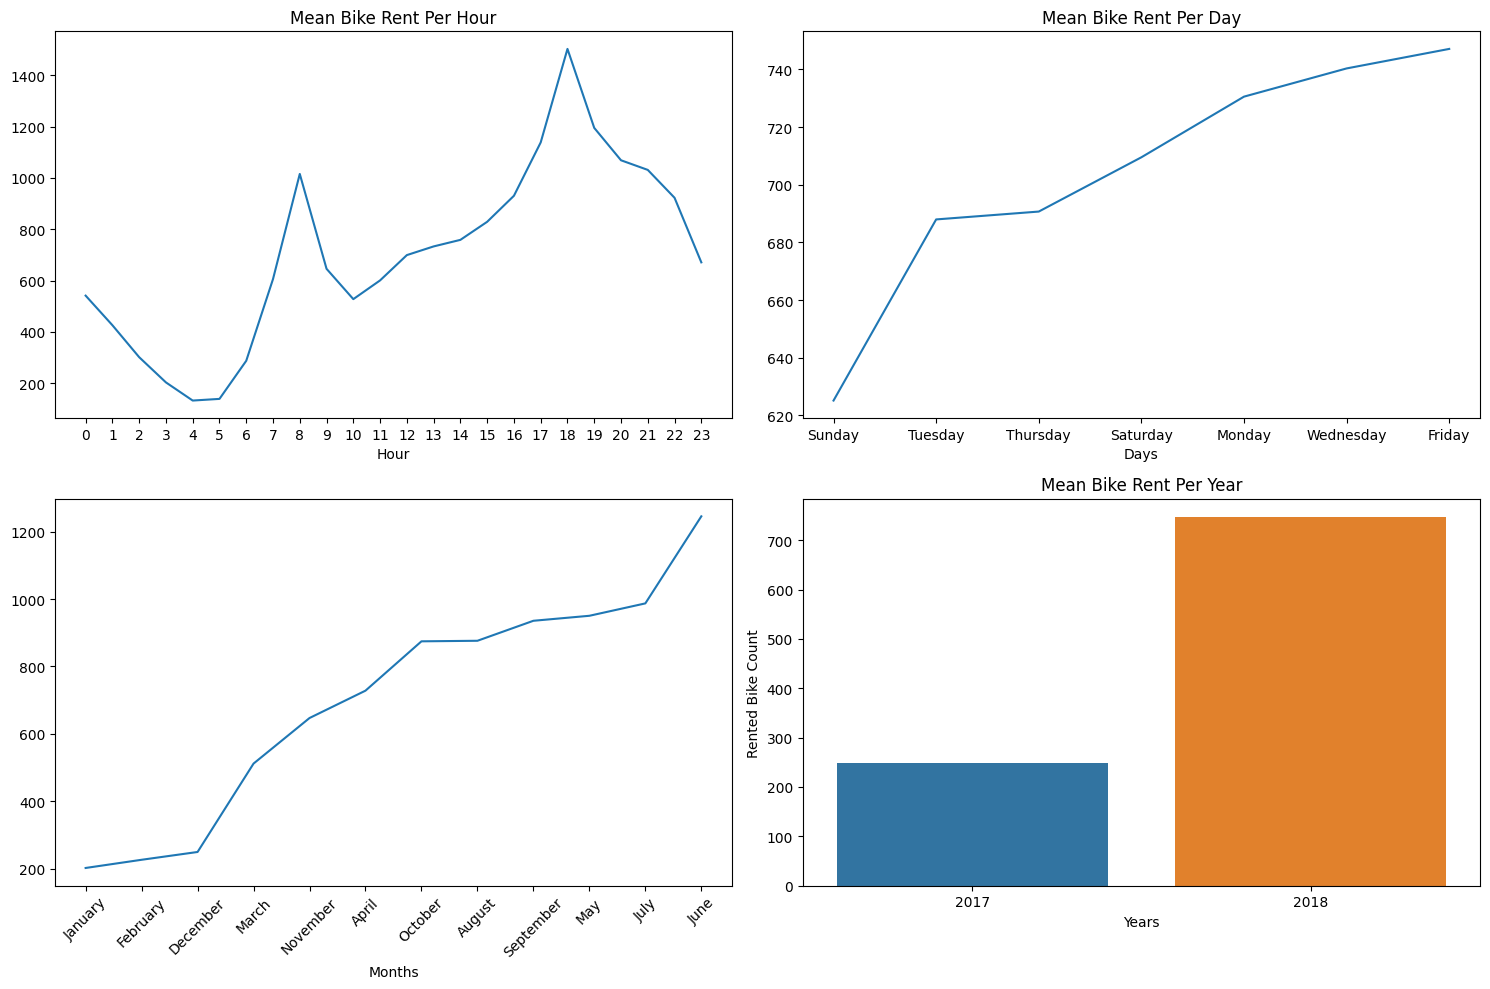

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# for hours
hourly_bike_rent = df.groupby(['Hour']).agg({'Rented Bike Count': 'mean'})
sns.lineplot(data=hourly_bike_rent, ax=ax[0][0])
ax[0][0].set_title('Mean Bike Rent Per Hour')
ax[0][0].legend().set_visible(False)
ax[0][0].set_xticks(df['Hour'].unique().tolist())

# for days
daily_bike_rent = df.groupby(['Days']).agg({'Rented Bike Count': 'mean'})
sns.lineplot(data=daily_bike_rent.sort_values('Rented Bike Count'), ax=ax[0][1])
ax[0][1].set_title('Mean Bike Rent Per Day')
ax[0][1].legend().set_visible(False)

# for months
monthly_bike_rent = df.groupby(['Months']).agg({'Rented Bike Count': 'mean'})
sns.lineplot(data=monthly_bike_rent.sort_values('Rented Bike Count'), ax=ax[1][0])
ax[1][0].legend().set_visible(False)
ax[1][0].tick_params(axis='x', rotation=45)

# for years
yearly_bike_rent = df.groupby(['Years']).agg({'Rented Bike Count': 'mean'})
sns.barplot(data=yearly_bike_rent, x=yearly_bike_rent.index, y=yearly_bike_rent['Rented Bike Count'], ax=ax[1][1])
ax[1][1].set_title('Mean Bike Rent Per Year')

plt.tight_layout()
plt.show()

Following observation can be made from the graphs:

- Hours: Bike rent count is high during office timings.
- Days: Demand is high during week-days.
- Months: Demand is high is during summers and less during winters
- Years: Demand is high in 2018, which is due to large sample size from year 2018 (bike rent was introduce at the end of 2017).

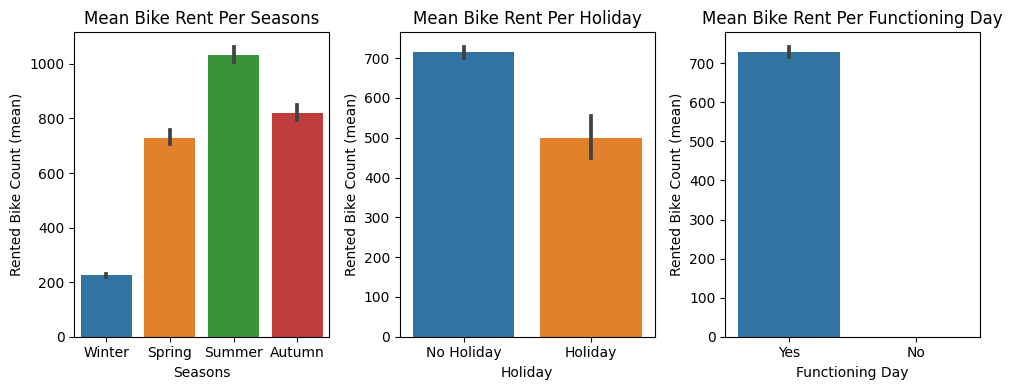

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# for seasons
sns.barplot(data=df, y='Rented Bike Count', x='Seasons', estimator=np.mean, ax=ax[0])
ax[0].set_title('Mean Bike Rent Per Seasons')
ax[0].set_ylabel('Rented Bike Count (mean)')

# for holidays
sns.barplot(data=df, y='Rented Bike Count', x='Holiday', estimator=np.mean, ax=ax[1])
ax[1].set_title('Mean Bike Rent Per Holiday')
ax[1].set_ylabel('Rented Bike Count (mean)')

# for bike rent functioning days
sns.barplot(data=df, y='Rented Bike Count', x='Functioning Day', estimator=np.mean, ax=ax[2])
ax[2].set_title('Mean Bike Rent Per Functioning Day')
ax[2].set_ylabel('Rented Bike Count (mean)')

plt.tight_layout()
plt.show()

Following observations can be made from the graphs:

- Seasons: Demand is high is during spring, summers, autumn and less during winters
- Holidays: Bike rent count is high during no holidays.
- Functioning Days: Demand is high when they are available which makes sense.

Let's also plot hourly graph with respect to weekdays/ weekends and holidays/no holidays
For weekdays vs weekends, we'll create a new columns called Week Day

In [39]:
# create week day column
df['Week Day'] = df['Days'].apply(lambda day: 'No' if day in ['Saturday', 'Sunday'] else 'Yes')

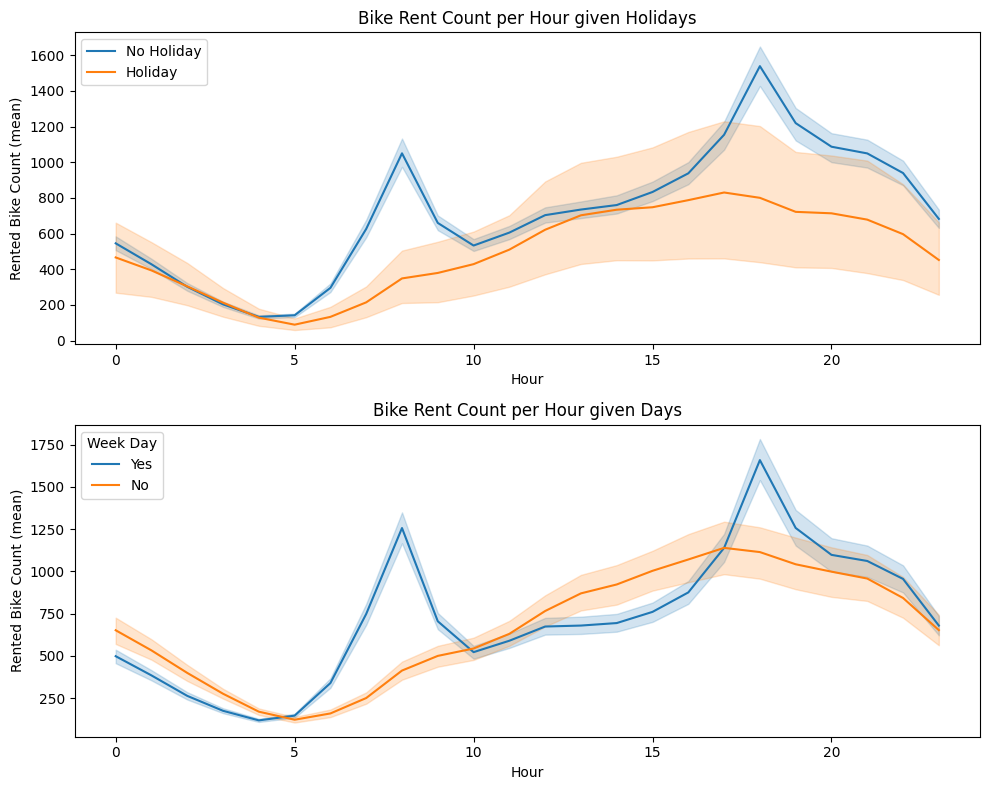

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count' , hue='Holiday', ax=ax[0])
ax[0].set_ylabel('Rented Bike Count (mean)')
ax[0].set_title('Bike Rent Count per Hour given Holidays')
ax[0].legend(loc=('upper left'))

sns.lineplot(data=df, x='Hour', y='Rented Bike Count' , hue='Week Day', ax=ax[1])
ax[1].set_ylabel('Rented Bike Count (mean)')
ax[1].set_title('Bike Rent Count per Hour given Days')
ax[1].legend(loc=('upper left'), title='Week Day')

plt.tight_layout()
plt.show()

#### Final Observation
Now we can clearly observe that bike rent demand is clearly high during office timings, weekdays, and summer time. In conclusion, the target variable (Bike Rent Count) is correlated to Date features (hour, day, month).

### EDA of numeric features (mostly related to weather)

In [41]:
# select numeric features for analysis
num_feature = df.select_dtypes(exclude='object')

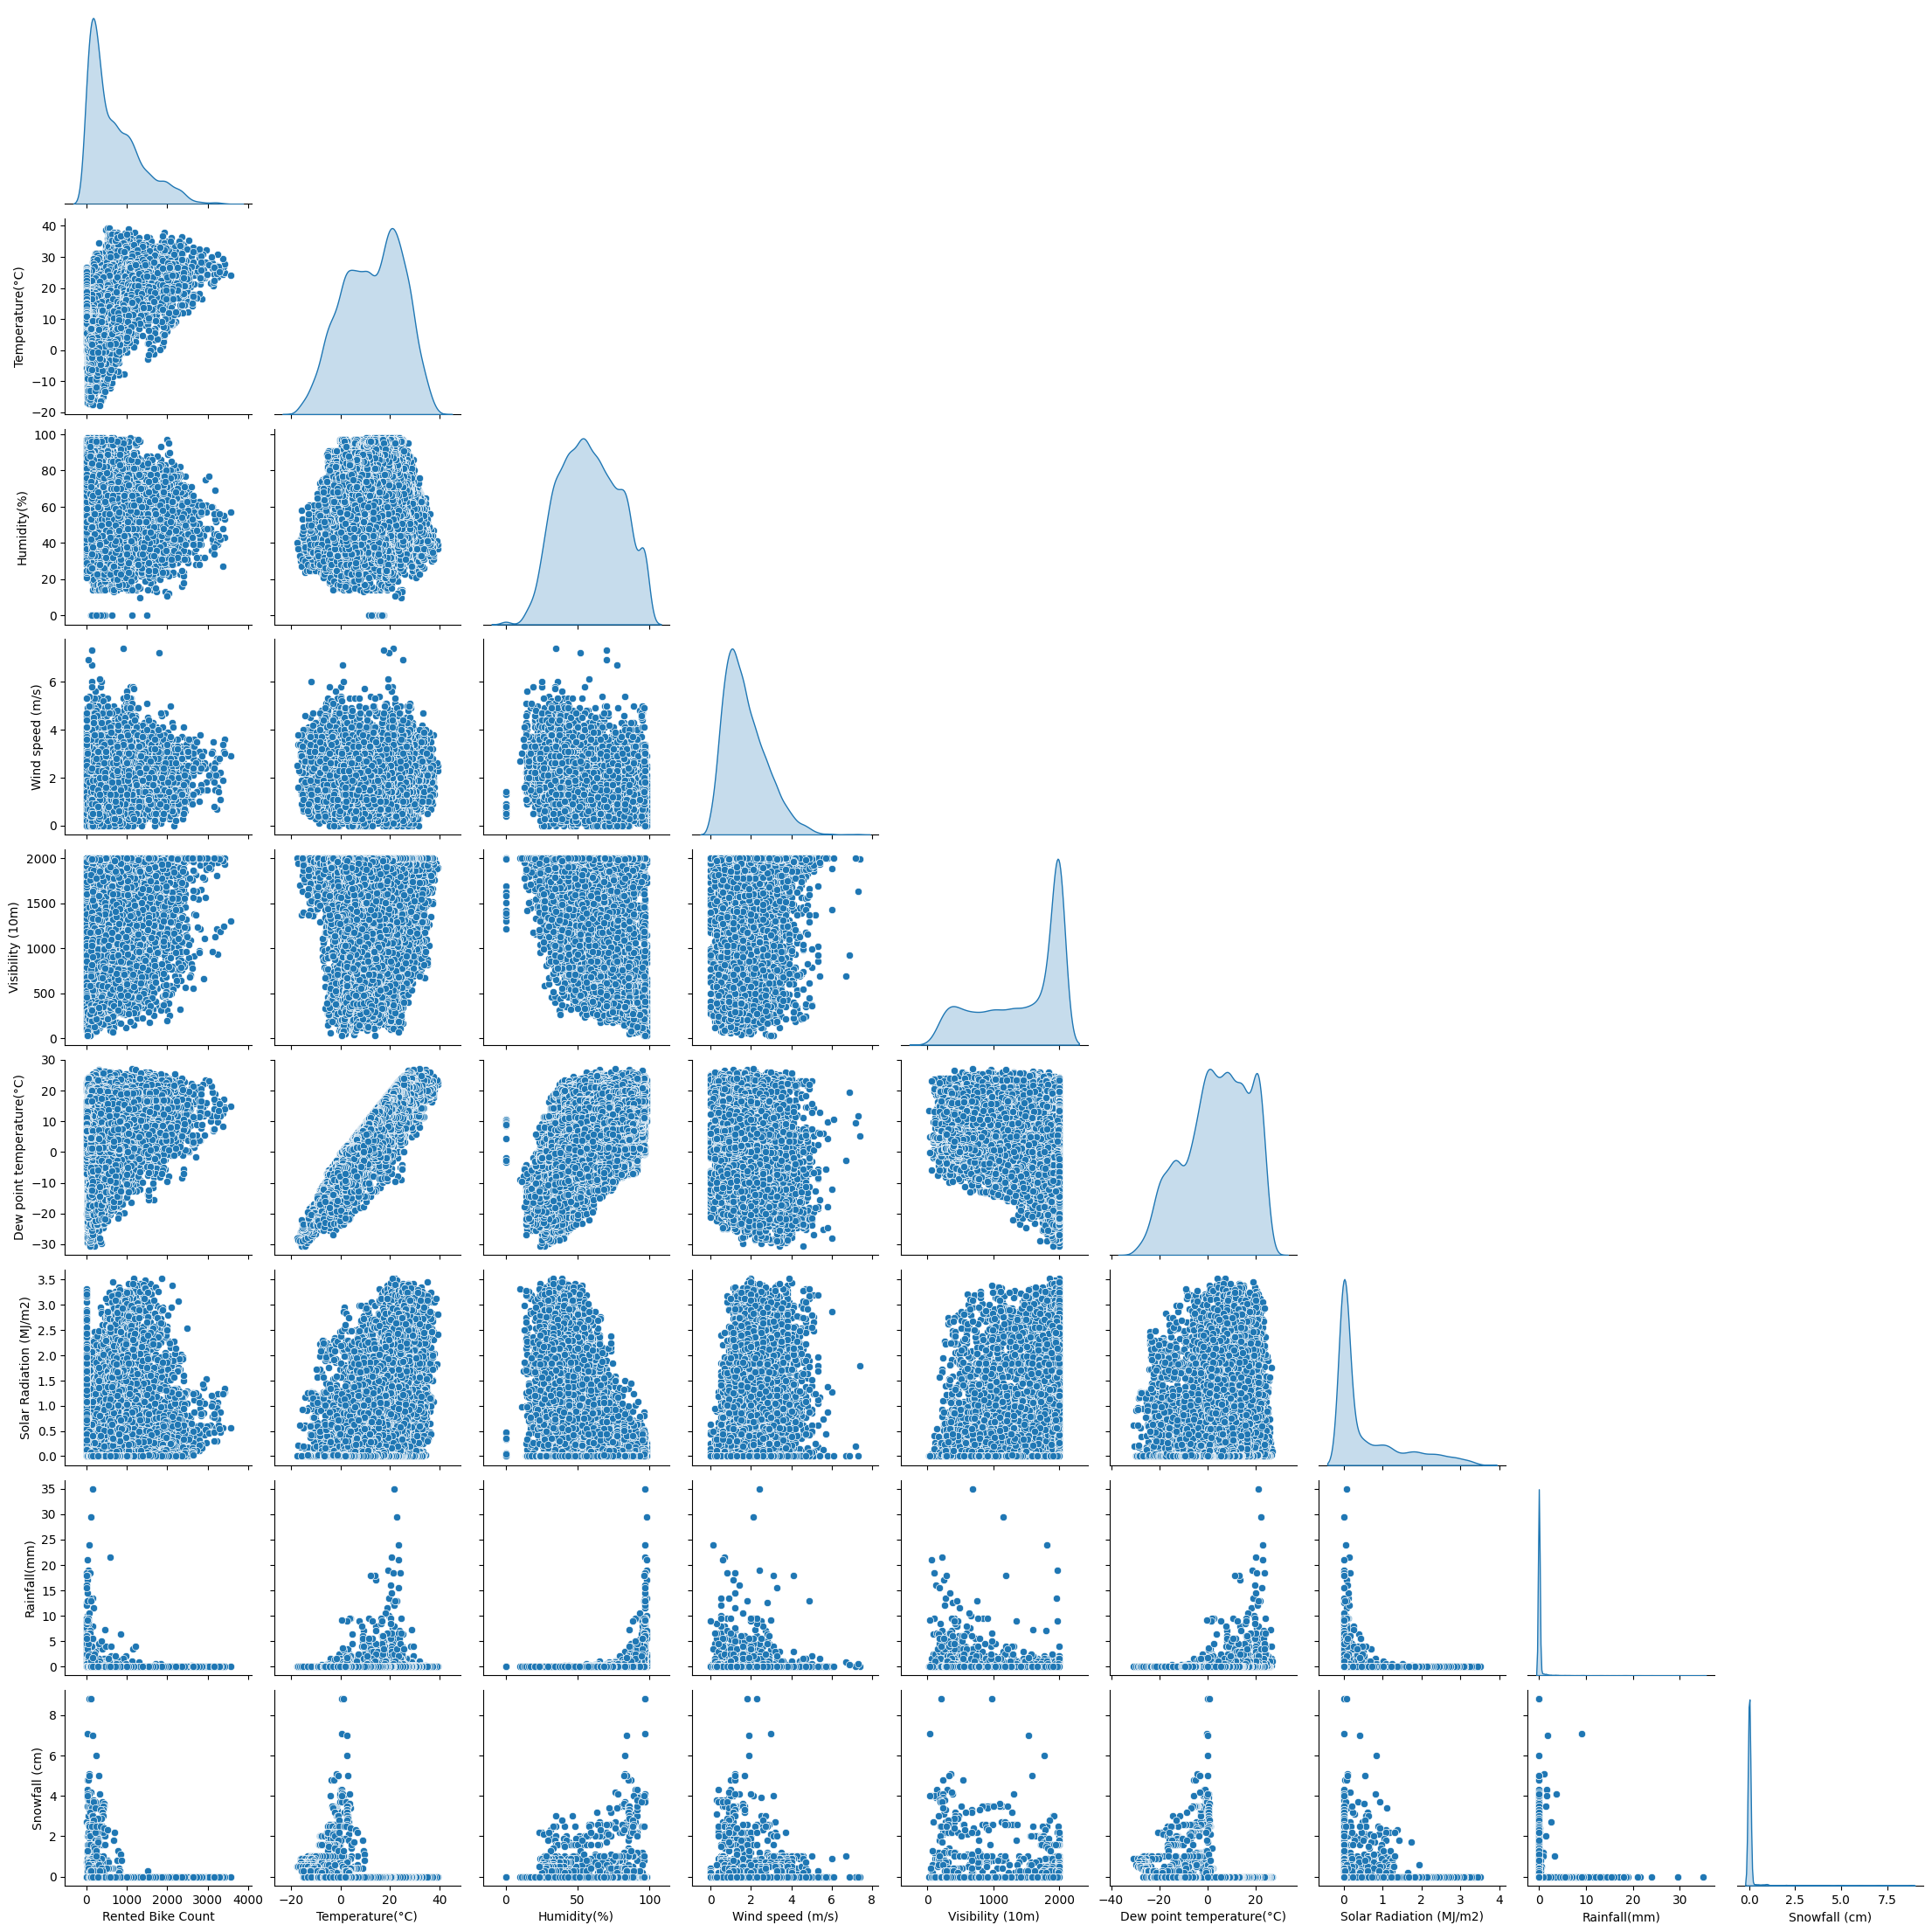

In [42]:
sns.pairplot(data=num_feature, corner=True, diag_kind='kde')
plt.show()

#### Observation
- Very few features have linear relationship with target variable (Rented Bike Count) as such.
- We can also observe multicollinearity between Temperature and Dew Point Temperature (also observable in the heatmap below).
- Some features are highly skewed.

Feature correlation with Rented Bike Count (target) calculate below

In [43]:
print('Correlation of numeric features with target')
num_feature.corr()['Rented Bike Count'].sort_values()

Correlation of numeric features with target


Humidity(%)                 -0.199780
Snowfall (cm)               -0.141804
Rainfall(mm)                -0.123074
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Solar Radiation (MJ/m2)      0.261837
Dew point temperature(°C)    0.379788
Temperature(°C)              0.538558
Rented Bike Count            1.000000
Name: Rented Bike Count, dtype: float64

Generating heatmap for correlations

<AxesSubplot: >

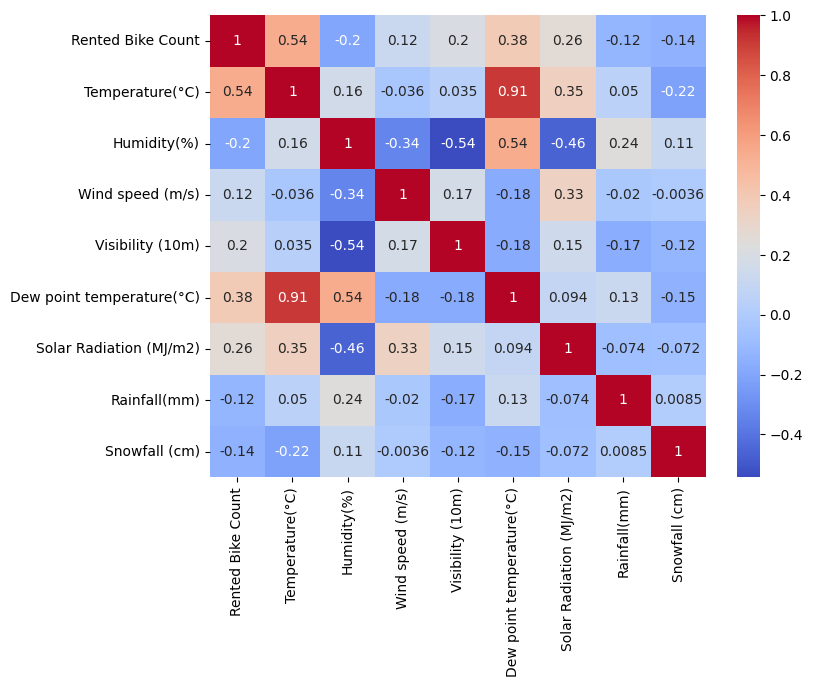

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(num_feature.corr(), cmap='coolwarm', annot=True)

<h2>Feature Selection</h2>

- Dropping "Dew point temperature" due to multicollinearity with "Temperature".
- Dropping "Year" becuase mostly samples are just from 2018.
- Dropping "Days" and keeping "Week Day"
- Dropping "Months" and keeping "Seasons"

In [45]:
df = df.drop(['Dew point temperature(°C)', 'Days', 'Months', 'Years'], axis=1)

In [46]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week Day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Yes


<h2>Feature Encoding</h2>

In [51]:
def feature_encode(df):
    # numeric features
    num_features = df.select_dtypes(exclude='object')
    # categorical features
    cat_features = df.select_dtypes(include='object')
    # get dummy variables for categorical features
    dummy_features = pd.get_dummies(cat_features, drop_first=True)

    # merge into final dataframe
    df_final = pd.concat([num_features, dummy_features], axis=1)
    return df_final

df_final = feature_encode(df)

/tmp/ipykernel_16108/1302332259.py:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_features = pd.get_dummies(cat_features, drop_first=True)


In [52]:
df_final.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Week Day_Yes'],
      dtype='object')

In [53]:
df_final.to_csv('data/Clean_Seoul_BikeData.csv', index=False)

<h2>Creating Regression Model</h2>

For the sake of simplicity & brevity here (for my portfolio), only resorting to training and testing two regression learning algorithms:
- Elastic Net
- Gradient Boosting Regressor

Ideally, we have to train on a bunch of different models followed by hyper-parameter tuning and then select the best one with respect to evaluation scores.

<h3>Train Test Split and Feature Scaling</h3>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/Clean_Seoul_BikeData.csv')
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>Model 1: ElasticNet with grid search for hyper-parameter tuning</h3>

In [55]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# base model to tune
base_model = ElasticNet(max_iter=3000)

# hyper-parameter grid
param_grid = {'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                'alpha':[0.05, 0.1, 1, 5, 10, 50, 100]}
# grid search
reg_model = GridSearchCV(estimator=base_model,
                         param_grid=param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         verbose=0)
# fit model
reg_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=3000),
             param_grid={'alpha': [0.05, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [56]:
reg_model.best_estimator_

ElasticNet(alpha=0.05, l1_ratio=0.9, max_iter=3000)

In [57]:
reg_model.best_params_

{'alpha': 0.05, 'l1_ratio': 0.9}

<h3>Prediction and Model Evaluation</h3>

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# plot different evaluation scores for given prediction
def scorer(y_test, y_pred):
    print(f"Mean Value of Bike Rent Count:\t{np.mean(y)}")
    print(f"MAE Value:\t{mean_absolute_error(y_test, y_pred)}")
    print(f"MSE Value:\t{mean_squared_error(y_test, y_pred)}")
    print(f"RMSE Value:\t{np.sqrt(mean_squared_error(y_test, y_pred))}")
    
    residual = y_test - y_pred

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    
    sns.scatterplot(x=y_test, y=residual, ax=ax[0])
    ax[0].axhline(y=0, color='red', ls='--')
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel('y test')
    ax[0].set_ylabel('residual')
    
    sns.kdeplot(data=residual, ax=ax[1])
    ax[1].set_title('Residual Distribution')
    ax[1].set_xlabel('residual')
    
    plt.tight_layout()
    plt.show()

In [59]:
y_pred = reg_model.predict(X_test_scaled)

==================== Linear Regression Model ====================
Mean Value of Bike Rent Count:	704.6020547945205
MAE Value:	287.52959344330134
MSE Value:	145852.04087062678
RMSE Value:	381.9058010434337


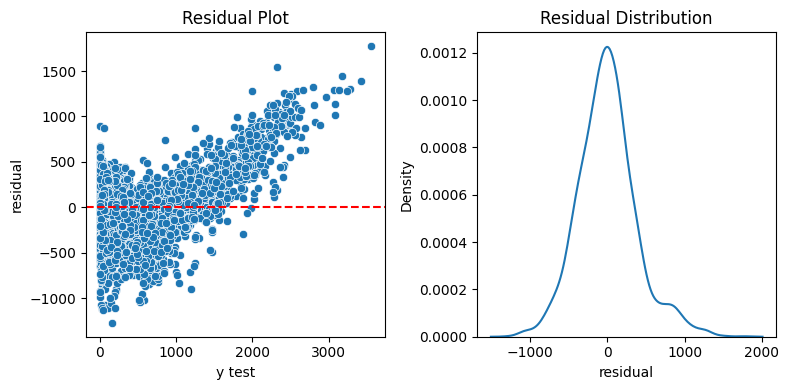

In [60]:
print(f"{'='*20} Linear Regression Model {'='*20}")
scorer(y_test, y_pred)

<h3>Model 2: Gradient Boosting Regressor with grid search for hyper-parameter tuning</h3>

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# base model
gbreg_model = GradientBoostingRegressor()

# parameters for Gradient Boosting Regressor (chosen optimal ones for faster training)
param_grid={'loss':['huber'],#'squared_error', 'absolute_error','quantile'],
            'min_impurity_decrease':[0.4],#0.2,0.6],
            'criterion':['squared_error'],#'mae'],
            'n_estimators':[800],#600,400,1000], 
            'learning_rate': [0.01],#0.03,0.1,0.05], 
            'min_samples_leaf':[6],#4,8]
            'max_depth':[25],#15,20,30],
            'subsample':[0.7],#0.5,1.0],
            'max_leaf_nodes':[17],#15,10,20],
            'max_features':['sqrt']#'sqrt', 'log2'] 
            }
            
# using grid search
gradient_boost_grid_search = GridSearchCV(estimator=gbreg_model,
                                          param_grid=param_grid,
                                          n_jobs=-1,
                                          cv=5,
                                          verbose=0)
# fit model
gradient_boost_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.01], 'loss': ['huber'],
                         'max_depth': [25], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [17], 'min_impurity_decrease': [0.4],
                         'min_samples_leaf': [6], 'n_estimators': [800],
                         'subsample': [0.7]})

In [62]:
gradient_boost_grid_search.best_estimator_

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          loss='huber', max_depth=25, max_features='sqrt',
                          max_leaf_nodes=17, min_impurity_decrease=0.4,
                          min_samples_leaf=6, n_estimators=800, subsample=0.7)

==================== Gradient Boosting Regressor Model ====================
Mean Value of Bike Rent Count:	704.6020547945205
MAE Value:	137.8507604404246
MSE Value:	43853.06296412637
RMSE Value:	209.41122931716527


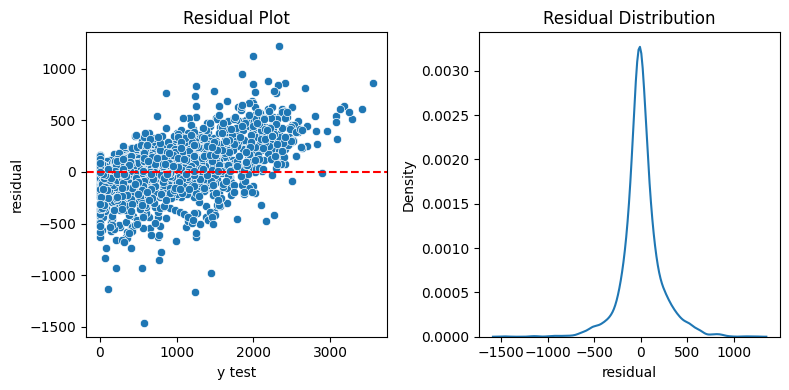

In [63]:
y_pred = gradient_boost_grid_search.predict(X_test_scaled)

print(f"{'='*20} Gradient Boosting Regressor Model {'='*20}")
scorer(y_test, y_pred)

<h2>Finalizing Model Choice and Deployment</h2>

After choosing the regression model (in our case GBRegressor), we will train it on the complete dataset and then save/deploy the model along with all the transformers (in our case StandardScaler()). This is how we would proceed from here:
- Choose final parameters based on test metrics
- Retrain on all data
- Save Standard Scaler
- Save the final model

<h3>Saving Model and Feature Scaler using Pipeline</h3>

In [64]:
from joblib import dump
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# final choosen model
model = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          loss='huber', max_depth=25, max_features='sqrt',
                          max_leaf_nodes=17, min_impurity_decrease=0.4,
                          min_samples_leaf=6, n_estimators=800, subsample=0.7)

# feature scaler
scaler = StandardScaler()

# create pipeline
pipeline = make_pipeline(scaler, model)

# fit the model on the complete dataset
model = pipeline.fit(X.values, y)

# save model
dump(model, './model/bike_rent_count.mod')

['./model/bike_rent_count.mod']

<h3>Prediction on new input</h3>

In [78]:
from joblib import load

# load model and scaler
model = load('./model/bike_rent_count.mod')

# selecting the first input of the dataset
given_input = [X.iloc[0].tolist()]

print(f"predicted value: {model.predict(given_input)[0]}\nactual value: {y[0]}")

predicted value: 168.83177689349304
actual value: 254
